In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pickle

In [2]:
# load normalized prediction data

with open('normalized_predictions.pkl', 'rb') as file:
    RF_ens_preds = pickle.load(file)
    
emmas_preds = np.load('Downloads/norm_results_et.npy', allow_pickle=True)

emils_preds = np.load('emils_preds', allow_pickle=True)

tonis_preds = np.load('Downloads/predsLstm.pkl', allow_pickle=True)

tonis_dense_preds = np.load('Downloads/Dense_Daten_CV.pkl', allow_pickle=True)

In [3]:
def norm_dot_product(v1, v2):
    dot_product = np.dot(v1, v2)
    
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    
    return dot_product/(norm1*norm2)

## Functions for finding averages of scoring metrics in different peptide lengths

In [4]:
def avg_ndp_per_length(predictions, test):
    pred_df = pd.DataFrame({'predictions': list(predictions)})
    pred_df['length'] = pred_df['predictions'].apply(len)
    pred_df['length'] = pred_df['length'] / 2

    ndps = []
    for pred_array, test_array in zip(predictions, test):
        n = norm_dot_product(pred_array, test_array)
        ndps.append(n)

    pred_df['ndp'] = ndps
    average_ndp_by_length = pred_df.groupby('length')['ndp'].mean()
    return average_ndp_by_length

In [5]:
def avg_pearsonr_per_length(predictions, test):
    pred_df = pd.DataFrame({'predictions': list(predictions)})
    pred_df['length'] = pred_df['predictions'].apply(len)
    pred_df['length'] = pred_df['length'] / 2

    pearsons = []
    for pred_array, test_array in zip(predictions, test):
        n = pearsonr(pred_array, test_array)[0]
        pearsons.append(n)

    pred_df['pearson'] = pearsons
    average_pearsonr_by_length = pred_df.groupby('length')['pearson'].mean()
    return average_pearsonr_by_length

In [6]:
def avg_mse_per_length(predictions, test):
    pred_df = pd.DataFrame({'predictions': list(predictions)})
    pred_df['length'] = pred_df['predictions'].apply(len)
    pred_df['length'] = pred_df['length'] / 2

    m = []
    for pred_array, test_array in zip(predictions, test):
        n = mean_squared_error(pred_array, test_array)
        m.append(n)

    pred_df['mae'] = m
    average_mae_by_length = pred_df.groupby('length')['mae'].mean()
    return average_mae_by_length

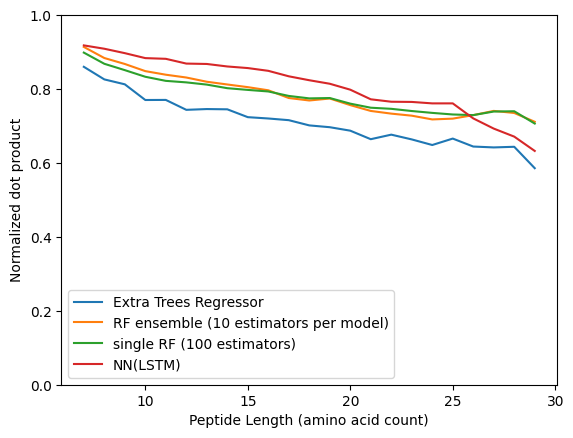

In [13]:
# plotting ndp

emma_ndp = avg_ndp_per_length(emmas_preds[0], emmas_preds[1])

ensfr_ndp = avg_ndp_per_length(RF_ens_preds[0],RF_ens_preds[1])

vik_ndp = avg_ndp_per_length(emils_preds[0], emils_preds[1])

toni_ndp = avg_ndp_per_length(tonis_preds[0], tonis_preds[1])

#dense_ndp = avg_ndp_per_length(tonis_dense_preds[0], tonis_dense_preds[1])

plot_df = pd.DataFrame([emma_ndp, ensfr_ndp, vik_ndp, toni_ndp, dense_ndp])

plot_df = plot_df.reset_index(drop=True)


ET_data = plot_df.iloc[0]
peptide_lengths = range(7, 30)

RFE_data = plot_df.iloc[1]

vik_data = plot_df.iloc[2]

toni_data = plot_df.iloc[3]

#dense_data = plot_df.iloc[4]

plt.plot(peptide_lengths, ET_data, label='Extra Trees Regressor')

plt.plot(peptide_lengths, RFE_data, label='RF ensemble (10 estimators per model)')

plt.plot(peptide_lengths, vik_data, label='single RF (100 estimators)')

plt.plot(peptide_lengths, toni_data, label='NN(LSTM)')

#plt.plot(peptide_lengths, dense_data, label = 'NN(Dense)')

plt.xlabel('Peptide Length (amino acid count)')
plt.ylabel('Normalized dot product')
plt.legend()
#plt.title('Average normalized dot product for different peptide lengths')
plt.ylim(0,1)
plt.show()

epa
avg
plotdf


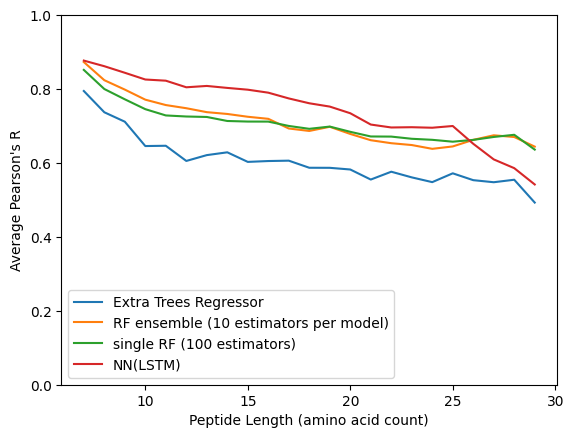

In [14]:
# plotting pearsonr

emma_p = avg_pearsonr_per_length(emmas_preds[0], emmas_preds[1])

print('epa')

ensfr_p = avg_pearsonr_per_length(RF_ens_preds[0],RF_ens_preds[1])

vik_p = avg_pearsonr_per_length(emils_preds[0], emils_preds[1])

toni_p = avg_pearsonr_per_length(tonis_preds[0], tonis_preds[1])

print('avg')

plot_df = pd.DataFrame([emma_p, ensfr_p, vik_p, toni_p])

plot_df = plot_df.reset_index(drop=True)

print('plotdf')


ET_data = plot_df.iloc[0]
peptide_lengths = range(7, 30)

RFE_data = plot_df.iloc[1]

vik_data = plot_df.iloc[2]

toni_data = plot_df.iloc[3]

plt.plot(peptide_lengths, ET_data, label='Extra Trees Regressor')

plt.plot(peptide_lengths, RFE_data, label='RF ensemble (10 estimators per model)')

plt.plot(peptide_lengths, vik_data, label='single RF (100 estimators)')

plt.plot(peptide_lengths, toni_data, label='NN(LSTM)')

plt.xlabel('Peptide Length (amino acid count)')
plt.ylabel("Average Pearson's R")
plt.legend()
#plt.title('Average pearsonr for different peptide lengths')
plt.ylim(0,1)
plt.show()

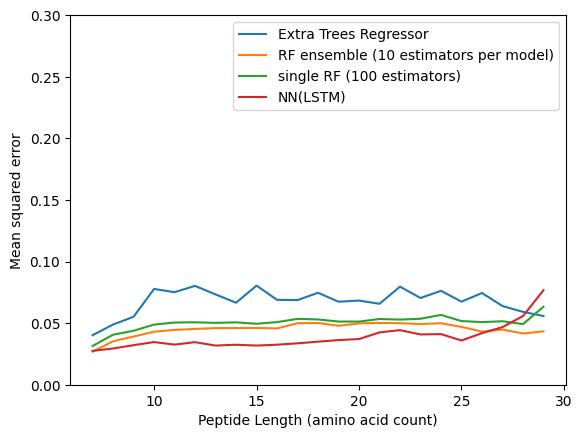

In [15]:
# plotting mse

emma_mse = avg_mse_per_length(emmas_preds[0], emmas_preds[1])

ensfr_mse = avg_mse_per_length(RF_ens_preds[0],RF_ens_preds[1])

vik_mse = avg_mse_per_length(emils_preds[0], emils_preds[1])

toni_mse = avg_mse_per_length(tonis_preds[0], tonis_preds[1])

#dense_mse = avg_mse_per_length(tonis_dense_preds[0], tonis_dense_preds[1])

plot_df = pd.DataFrame([emma_mse, ensfr_mse, vik_mse, toni_mse, dense_mse])

plot_df = plot_df.reset_index(drop=True)


ET_data = plot_df.iloc[0]
peptide_lengths = range(7, 30)

RFE_data = plot_df.iloc[1]

vik_data = plot_df.iloc[2]

toni_data = plot_df.iloc[3]

#dense_data = plot_df.iloc[4]

plt.plot(peptide_lengths, ET_data, label='Extra Trees Regressor')

plt.plot(peptide_lengths, RFE_data, label='RF ensemble (10 estimators per model)')

plt.plot(peptide_lengths, vik_data, label='single RF (100 estimators)')

plt.plot(peptide_lengths, toni_data, label='NN(LSTM)')

#plt.plot(peptide_lengths, dense_data, label='dense')

plt.xlabel('Peptide Length (amino acid count)')
plt.ylabel('Mean squared error')
plt.legend()
#plt.title('Average mean squared error for different peptide lengths')
plt.ylim(0,0.3)
plt.show()

# Analysing Variance of RF ensemble and NN

In [6]:
ndps = []
t_ndps = []
mses = []
t_mses = []
rs = []
t_rs = []

for i in range(len(RF_ens_preds[0])):
    ndps.append(norm_dot_product(RF_ens_preds[0][i], RF_ens_preds[1][i]))
    t_ndps.append(norm_dot_product(tonis_preds[0][i], tonis_preds[1][i]))
    mses.append(mean_squared_error(RF_ens_preds[0][i], RF_ens_preds[1][i]))
    t_mses.append(mean_squared_error(tonis_preds[0][i], tonis_preds[1][i]))
    rs.append(pearsonr(RF_ens_preds[0][i], RF_ens_preds[1][i])[0])
    t_rs.append(pearsonr(tonis_preds[0][i], tonis_preds[1][i])[0])
    if i%10000==0:
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000


In [18]:
RF_ndp = np.std(ndps)
LSTM_ndp = np.std(t_ndps)
RF_r = np.std(rs)
LSTM_r = np.std(t_rs)
RF_mse = np.std(mses)
LSTM_mse = np.std(t_mses)

labels = ['Normalised dot product', 'Pearson\'s R', 'Mean squared error']

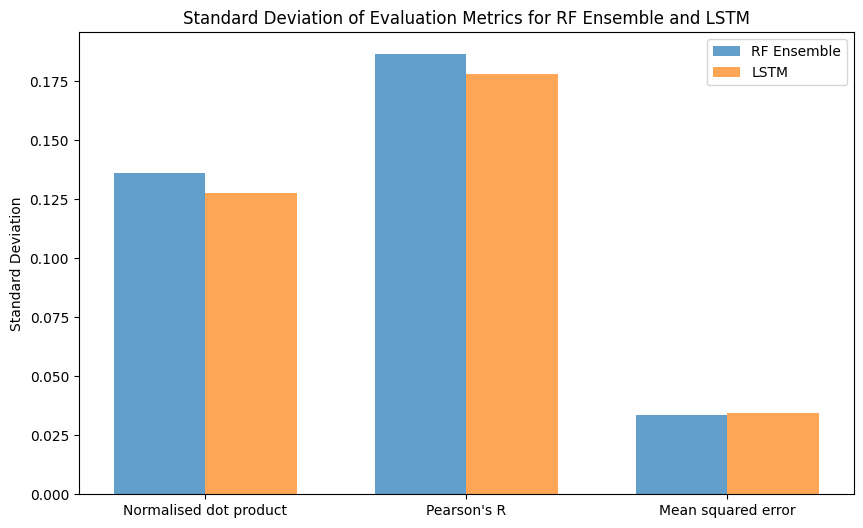

In [19]:
# plotting standard deviations

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, [RF_ndp, RF_r, RF_mse], width, label='RF Ensemble', alpha=0.7)

# LSTM bars
ax.bar(x + width/2, [LSTM_ndp, LSTM_r, LSTM_mse], width, label='LSTM', alpha=0.7)

ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of Evaluation Metrics for RF Ensemble and LSTM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()